In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("ford.csv")
df.tail()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


In [3]:
# Easier and smaller way to do the entire above code
# By defining a function

def unique_val_count(data, column):
    #data is the names the dataframes that we are going to create by the code below
    #column is the name of the columns
    
    df_count = df[column].value_counts()
    # Here we are counting the values of the column
    
    df_count = pd.DataFrame(df_count)
    # Here we are creating separate dataframes of the columns
    
    df_count = df_count.reset_index()
    # Here we are resetting the names of the coloumns to "index" 
    
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    # Here we are changing the column name "index" to main dataframe's column name and main dataframe's column name to 'No_of_cars'
    
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    # Here we are finding the % of cars for each column/dataframe
    
    return df_count

In [4]:
# Name of new dataframes created from four coloumn of main dataframe 'ford'

model_count = unique_val_count(df, 'model')

year_count = unique_val_count(df, 'year')

transmission_count = unique_val_count(df, 'transmission')

fueltype_count = unique_val_count(df, 'fuelType')


In [5]:
# sort the year_count DataFrame based on 'year' so it will show in ascending order

year_count = year_count.sort_values(by='year')

In [6]:
# Creating barplots using function definition

def barplot(data, column_x, color, rotation, yticks):
    # data will be the name of the dataframe
    # column_x is the column that willgo in x axis
    # rotation is to rotate the labels \
    # yticks will be the range/bins/class-intervals of y axis
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
  
    plt.title("Percentage of cars present for each " + column_x)
    
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    plt.xticks(rotation=rotation)
    # With rotation, it will rotate if required
    
    plt.yticks(yticks)
    # Here we are saying that yticks will be different for each dataframes

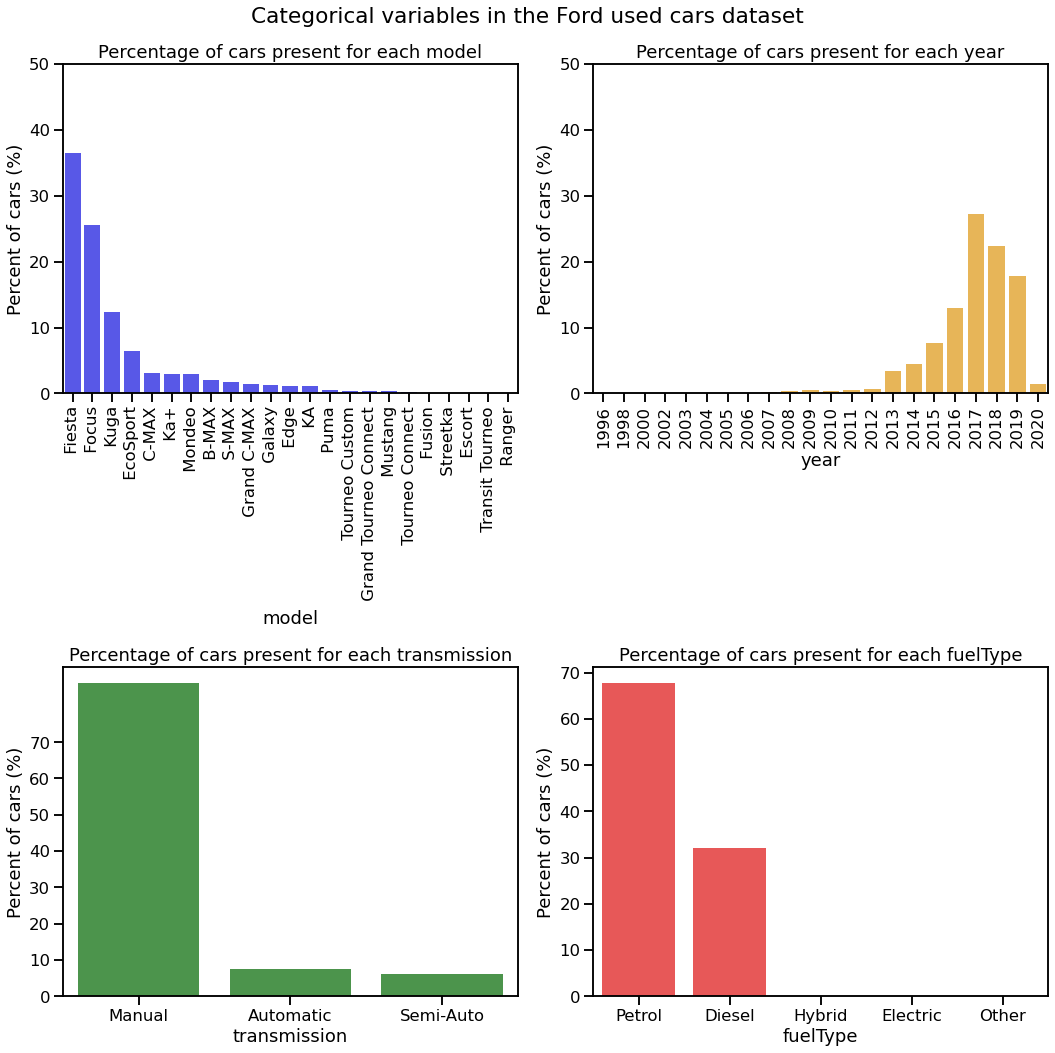

In [7]:
sns.set_context('talk')
# Here we are setting the layout of the graphs. Other options are 'book', 'paper'

plt.figure(figsize=(15,15))
# Here we are setting the size of the graph. (Width, Length/Height)

# Now we'll create subplots, which means now we can combine multiple graphs and show them together.
# To position them correctly, we'll use rows and columns numbers based on the graphs placements on the figure
# (Number of rows, Number of column, position of the graph)
# In total,there will be 4 graphs in 2 rows and 2 columns.

# Subplot 'model' will be in position 1 (i.e. 1st row, 1st column)
plt.subplot(2,2,1)
# (data, column_x, color, rotation, yticks)
# data = Dataframe = model_count, 
# column_x will have the name of column that will go in x axis; it changes depending of the dataframe since each dataframe has different column name for the column that will go in x axis
# yticks = will be the range/bins/class-intervals of y axis
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 2 (i.e. 1st row, 2nd column)
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 3 (i.e. 2nd row, 1st column)
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# Subplot 'model' will be in position 4 (i.e. 2nd row, 2nd column)
plt.subplot(2,2,4)
barplot(fueltype_count, 'fuelType', 'red', 0, np.arange(0,71,10))


plt.suptitle("Categorical variables in the Ford used cars dataset")


plt.tight_layout()
# tight_layout helps avoid overlapping of texts among graphs

plt.show()

In the figure above, first graph shows the percentage distribution of used Ford cars based of the model.
Second graph shows the percentage of used Ford cars per year, from 1996 to 2020.
Third graph shows the three variety of transmissions and the percentage of each found in Ford used cars.
Fourth graph shows the percentage of used Ford cars with fuel types distributed among petrol, diesel, hybrid, electric or others.